# 🔄 أساسيات تدفقات العمل مع نماذج GitHub (Python)

## 📋 دليل تنسيق تدفقات العمل

يقدم هذا الدفتر قدرات **منشئ تدفقات العمل** القوية في إطار عمل Microsoft Agent. تعلم كيفية إنشاء تدفقات عمل متعددة الخطوات ومعقدة يمكنها التعامل مع العمليات التجارية المعقدة وتنسيق عمليات الذكاء الاصطناعي بسلاسة.

## 🎯 أهداف التعلم

### 🏗️ **هيكلية تدفقات العمل**
- **منشئ تدفقات العمل**: تصميم وتنسيق عمليات متعددة الخطوات
- **تنفيذ قائم على الأحداث**: التعامل مع أحداث تدفقات العمل وتحولات الحالة
- **تصميم مرئي لتدفقات العمل**: إنشاء وتصوير هيكلية تدفقات العمل
- **تكامل نماذج GitHub**: استخدام نماذج الذكاء الاصطناعي في سياقات تدفقات العمل

### 🔄 **تنسيق العمليات**
- **العمليات المتسلسلة**: ربط مهام الوكيل المتعددة بترتيب منطقي
- **المنطق الشرطي**: تنفيذ نقاط اتخاذ القرار وتدفقات العمل المتفرعة
- **معالجة الأخطاء**: استرداد الأخطاء بشكل قوي ومرونة تدفقات العمل
- **إدارة الحالة**: تتبع وإدارة حالة تنفيذ تدفقات العمل

### 📊 **أنماط تدفقات العمل للمؤسسات**
- **أتمتة العمليات التجارية**: أتمتة تدفقات العمل التنظيمية المعقدة
- **تنسيق الوكلاء المتعددين**: تنسيق وكلاء متخصصين متعددين
- **تنفيذ قابل للتوسع**: تصميم تدفقات عمل لعمليات على مستوى المؤسسات
- **المراقبة والملاحظة**: تتبع أداء تدفقات العمل ونتائجها

## ⚙️ المتطلبات والإعداد

### 📦 **التبعيات المطلوبة**

قم بتثبيت إطار عمل الوكيل مع قدرات تدفقات العمل:

```bash
pip install agent-framework-core -U
```

### 🔑 **إعداد نماذج GitHub**

**إعداد البيئة (.env file):**
```env
GITHUB_TOKEN=your_github_personal_access_token
GITHUB_ENDPOINT=https://models.inference.ai.azure.com
GITHUB_MODEL_ID=gpt-4o-mini
```

### 🏢 **استخدامات المؤسسات**

**أمثلة على العمليات التجارية:**
- **إعداد العملاء**: تدفقات عمل التحقق والإعداد متعددة الخطوات
- **خط إنتاج المحتوى**: إنشاء المحتوى ومراجعته ونشره تلقائيًا
- **معالجة البيانات**: تدفقات ETL مع تحويل مدعوم بالذكاء الاصطناعي
- **ضمان الجودة**: عمليات الاختبار والتحقق التلقائية

**فوائد تدفقات العمل:**
- 🎯 **الموثوقية**: تنفيذ محدد مع استرداد الأخطاء
- 📈 **القابلية للتوسع**: التعامل مع أتمتة العمليات ذات الحجم الكبير
- 🔍 **الملاحظة**: سجلات تدقيق كاملة ومراقبة
- 🔧 **سهولة الصيانة**: تصميم مرئي ومكونات معيارية

## 🎨 أنماط تصميم تدفقات العمل

### هيكلية تدفق العمل الأساسية
```mermaid
graph TD
    A[Start] --> B[Agent Task 1]
    B --> C{Decision Point}
    C -->|Success| D[Agent Task 2]
    C -->|Failure| E[Error Handler]
    D --> F[End]
    E --> F
```

**المكونات الرئيسية:**
- **WorkflowBuilder**: محرك التنسيق الرئيسي
- **WorkflowEvent**: معالجة الأحداث والتواصل
- **WorkflowViz**: تمثيل مرئي لتدفقات العمل وتصحيح الأخطاء

لنبدأ في بناء أول تدفق عمل ذكي لديك! 🚀


In [1]:
! pip install agent-framework-core -U

In [2]:
# 🔄 Import Workflow and Agent Framework Components
# Core components for building sophisticated agent workflows

from agent_framework.openai import OpenAIChatClient    # 🤖 GitHub Models client integration
from agent_framework import WorkflowBuilder, WorkflowEvent, WorkflowViz  # 🏗️ Workflow orchestration tools

In [3]:
# 📦 Import Environment and System Utilities
# Essential libraries for configuration and environment management

import os                      # 🔧 Environment variable access
from dotenv import load_dotenv # 📁 Secure configuration loading

In [4]:
# 🔧 Initialize Environment Configuration
# Load GitHub Models API credentials from .env file
load_dotenv()

True

In [5]:
# 🔗 Initialize GitHub Models Chat Client for Workflow Operations
# Create the AI client that will power agents within our workflow
chat_client = OpenAIChatClient(
    base_url=os.environ.get("GITHUB_ENDPOINT"),    # 🌐 GitHub Models API endpoint
    api_key=os.environ.get("GITHUB_TOKEN"),        # 🔑 Authentication token
    model_id=os.environ.get("GITHUB_MODEL_ID")  # 🎯 Selected AI model
)

In [6]:
REVIEWER_NAME = "Concierge"
REVIEWER_INSTRUCTIONS = """
    You are an are hotel concierge who has opinions about providing the most local and authentic experiences for travelers.
    The goal is to determine if the front desk travel agent has recommended the best non-touristy experience for a traveler.
    If so, state that it is approved.
    If not, provide insight on how to refine the recommendation without using a specific example. 
    """

In [7]:
FRONTDESK_NAME = "FrontDesk"
FRONTDESK_INSTRUCTIONS = """
    You are a Front Desk Travel Agent with ten years of experience and are known for brevity as you deal with many customers.
    The goal is to provide the best activities and locations for a traveler to visit.
    Only provide a single recommendation per response.
    You're laser focused on the goal at hand.
    Don't waste time with chit chat.
    Consider suggestions when refining an idea.
    """

In [8]:
reviewer_agent   = chat_client.create_agent(
        instructions=(
           REVIEWER_INSTRUCTIONS
        ),
        name=REVIEWER_NAME,
    )

front_desk_agent = chat_client.create_agent(
        instructions=(
            FRONTDESK_INSTRUCTIONS
        ),
        name=FRONTDESK_NAME,
    )

In [9]:
workflow = WorkflowBuilder().set_start_executor(front_desk_agent).add_edge(front_desk_agent, reviewer_agent).build()

In [10]:

print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  FrontDesk["FrontDesk (Start)"];
  Concierge["Concierge"];
  FrontDesk --> Concierge;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "FrontDesk" [fillcolor=lightgreen, label="FrontDesk\n(Start)"];
  "Concierge" [label="Concierge"];
  "FrontDesk" -> "Concierge";
}
SVG file saved to: C:\Users\kinfeylo\AppData\Local\Temp\tmpq947fo_v.svg


In [11]:
class DatabaseEvent(WorkflowEvent): ...

Attempting to display SVG file at: C:\Users\kinfeylo\AppData\Local\Temp\tmpq947fo_v.svg


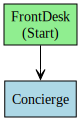

In [12]:
# Display the exported workflow SVG inline in the notebook

from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")


In [13]:
result =''
async for event in workflow.run_stream('I would like to go to Paris.'):
    if isinstance(event, DatabaseEvent):
        print(f"{event}")
    if isinstance(event, WorkflowEvent):
        result += str(event.data)
        # print(f"Workflow output: {event.data}")

In [14]:
result.replace("None", "")

'Visit the Louvre Museum for world-class art and historical masterpieces.While the Louvre is certainly an iconic destination, it can be quite touristy. To enhance the authenticity of your experience in Paris, consider recommending a lesser-known art space or gallery where you can appreciate local artists and their work. Additionally, exploring lesser-trodden neighborhoods or engaging with local artisans can provide a more genuine feel of Parisian culture. Aim for experiences that allow for personal interactions and deeper connections with the local community.While the Louvre is certainly an iconic destination, it can be quite touristy. To enhance the authenticity of your experience in Paris, consider recommending a lesser-known art space or gallery where you can appreciate local artists and their work. Additionally, exploring lesser-trodden neighborhoods or engaging with local artisans can provide a more genuine feel of Parisian culture. Aim for experiences that allow for personal inte


---

**إخلاء المسؤولية**:  
تم ترجمة هذا المستند باستخدام خدمة الترجمة بالذكاء الاصطناعي [Co-op Translator](https://github.com/Azure/co-op-translator). بينما نسعى لتحقيق الدقة، يرجى العلم أن الترجمات الآلية قد تحتوي على أخطاء أو عدم دقة. يجب اعتبار المستند الأصلي بلغته الأصلية المصدر الرسمي. للحصول على معلومات حاسمة، يُوصى بالترجمة البشرية الاحترافية. نحن غير مسؤولين عن أي سوء فهم أو تفسيرات خاطئة ناتجة عن استخدام هذه الترجمة.
